In [3]:
import matplotlib.pyplot as plt
import tensorflow.keras.losses as losses
import numpy as np
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

## UPAE

In [1]:
#run UPAE
%run main.py --u

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-09 22:42:59.108964: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-09 22:42:59.165318: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-09 22:42:59.166757: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 22:43:00.139633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:09<00:00, 64.83it/s]



Processing validation images




100%|██████████| 78/78 [00:01<00:00, 58.20it/s]



Processing testing images




100%|██████████| 858/858 [00:14<00:00, 59.20it/s]




Training AE model


2023-05-09 22:43:29.858503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Decoder
Epoch 1/10
UPAE Training
UPAE Training
10/10 [==============================] - 33s 3s/step - total_loss: : 7174.8488 - loss1: : 7174.8425 - loss2: : 0.0061 - binary_crossentropy: : 2982314.7727 - accuracy: : 7.3919e-05
Epoch 2/10
10/10 [==============================] - 28s 3s/step - total_loss: : 7234.9704 - loss1: : 7234.9626 - loss2: : 0.0079 - binary_crossentropy: : 3447593.4318 - accuracy: : 8.2060e-05
Epoch 3/10
10/10 [==============================] - 25s 3s/step - total_loss: : 7123.1331 - loss1: : 7123.1146 - loss2: : 0.0189 - binary_crossentropy: : 3269502.7727 - accuracy: : 7.5570e-05
Epoch 4/10
10/10 [==============================] - 25s 3s/step - total_loss: : 7217.3039 - loss1: : 7217.2751 - loss2: : 0.0287 - binary_crossentropy: : 3158683.7727 - accuracy: : 7.7136e-05
Epoch 5/10
10/10 [==============================] - 26s 3s/step - total_loss: : 7206.0238 - loss1: : 7205.9873 - loss2: : 0.0367 - binary_crossentropy: : 3147351.1136 - accuracy: : 7.7543e-05
Epoc

### Validation

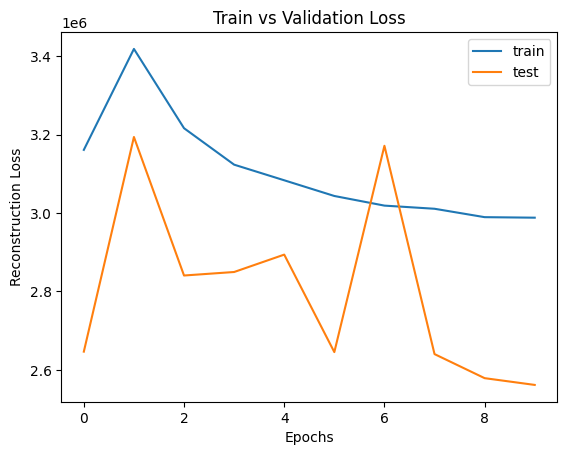

In [4]:

train_loss = history_train.history['binary_crossentropy: ']
valid_loss = history_valid.history['binary_crossentropy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Train vs Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Reconstruction Loss')
pyplot.legend()
pyplot.show()


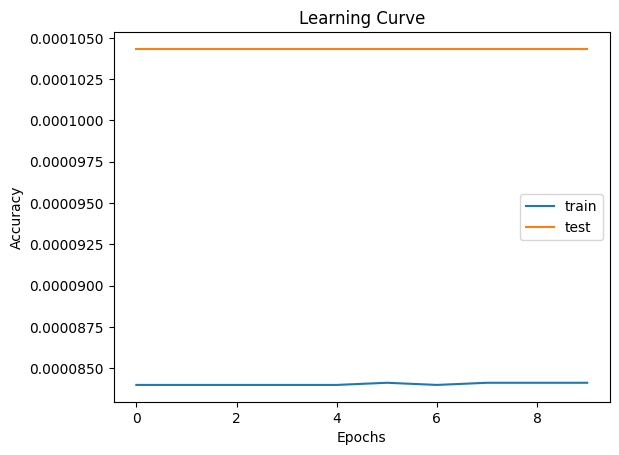

In [5]:
train_loss = history_train.history['accuracy: ']
valid_loss = history_valid.history['accuracy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Learning Curve')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

### Testing

In [8]:
#testing using testing set
input_images= image_datasets[2] 
generated = model.predict(input_images)
generated = np.array(generated)

2023-05-08 14:34:55.796935: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-08 14:34:55.956700: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-08 14:34:56.060390: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-08 14:34:56.177805: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-08 14:34:56.260324: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 112459776 exceeds 10% of free system memory.


In [9]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_images, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

reconstruction error score: 5288.056


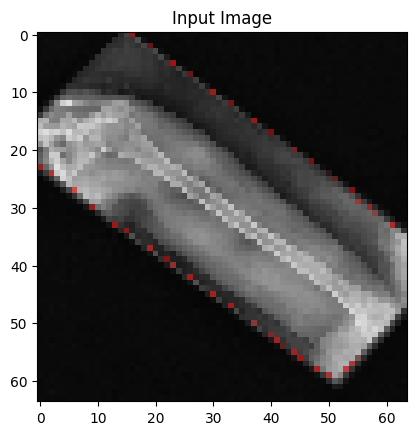

In [10]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()

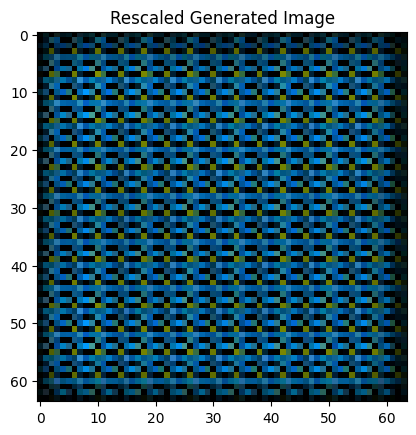

In [11]:
#rescaled generated image
generated_rescaled = (generated[0] - generated[0].min()) / (generated[0].max() - generated[0].min())
plt.imshow(generated_rescaled.reshape(64,64,3))
plt.title("Rescaled Generated Image")
plt.show()

## Vanilla AE

In [1]:
%run main.py 

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-06 22:30:13.399575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 22:30:13.454783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 22:30:13.455910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 22:30:14.543291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:11<00:00, 54.03it/s]




Processing validation images



100%|██████████| 78/78 [00:01<00:00, 47.86it/s]




Processing testing images



100%|██████████| 858/858 [00:15<00:00, 57.00it/s]




Training AE model


2023-05-06 22:30:47.732992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Decoder
Vanilla Loss
Vanilla Loss
10/10 [==============================] - 28s 2s/step - mse_loss: 7242.0550
Vanilla Validation
2/2 [==============================] - 2s 215ms/step - mse_loss: 6933.5456
